# Basic Analysis

## Import Libraries

In [1]:
# Custom imports
from statisco.statistics import closingReturns, mean, variance, stdDev, covariance, correlation
import matplotlib.pyplot as plt

# Foreing Libraries
import yfinance as yf
import numpy as np
import math
import pandas as pd

plt.style.use('dark_background')

In [ ]:
msft = yf.download("MSFT", period="1mo")
aapl = yf.download("AAPL", period="1mo")

[*********************100%%**********************]  1 of 1 completed

In [ ]:
msft.head(5)

## Statistics

### Close Returns

In [4]:
msft["MyCloseReturns"] = closingReturns(msft["Adj Close"])

In [5]:
aapl["MyCloseReturns"] = closingReturns(aapl["Adj Close"])

In [6]:
msft["CloseReturns"] = msft["Adj Close"].pct_change()

In [7]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume,MyCloseReturns,CloseReturns
Date,,,,,,,,
2023-11-09,362.299988,364.790009,360.359985,360.690002,359.959412,24847300,0.000000,NaN
2023-11-10,361.489990,370.100006,361.070007,369.670013,368.921234,28042100,0.024897,0.024897
2023-11-13,368.220001,368.470001,365.899994,366.679993,365.937256,19986500,-0.008088,-0.008088
2023-11-14,371.010010,371.950012,367.350006,370.269989,369.519989,27683900,0.009791,0.009791
2023-11-15,371.279999,373.130005,367.109985,369.670013,369.670013,26860100,0.000406,0.000406


### Mean

In [8]:
defaultMean = msft["MyCloseReturns"].mean()
myMean = mean(msft["MyCloseReturns"])
myMeanAapl = mean(aapl["MyCloseReturns"])

print(f"default pandas mean: {defaultMean}")
print(f"myMean: {myMean}")

default pandas mean: 0.0015004102588802159
myMean: 0.0015004102588802159


### Variance

In [9]:
defaultVariance = np.var(msft["MyCloseReturns"])
myVariance = variance(msft["MyCloseReturns"], myMean)
myVarianceAapl = variance(aapl["MyCloseReturns"], myMeanAapl)

print(f"default numpy variance: {defaultVariance}")
print(f"myMean: {myVariance}")

default numpy variance: 0.00013484495766059014
myMean: 0.00013484495766059014


### Std Dev

In [10]:
defaultStandardDeviation = msft["MyCloseReturns"].std()
myStandardDeviation = stdDev(msft["MyCloseReturns"], myMean)
myStandardDeviationAapl = stdDev(aapl["MyCloseReturns"], myMeanAapl)

print(f"default numpy std dev: {defaultStandardDeviation}")
print(f"myStandardDeviation: {myStandardDeviation}")

default numpy std dev: 0.011899042211187405
myStandardDeviation: 0.011612276161915463


### Covariance

In [11]:
covariance_matrix = np.cov(msft["MyCloseReturns"], aapl["MyCloseReturns"])
covariance_value = covariance_matrix[0, 1]

myCovariance = covariance(msft["MyCloseReturns"], myMean, aapl["MyCloseReturns"], myMeanAapl)

print(f"defualt covariance: {covariance_value}")
print(f"myCovariance: {myCovariance}")

defualt covariance: 7.747994065058295e-05
myCovariance: 7.747994065058295e-05


### Correlation

In [12]:
correlation_coefficient = np.corrcoef(msft["MyCloseReturns"], aapl["MyCloseReturns"])[0, 1]
myCorrelation = correlation(myCovariance, myVariance, myVarianceAapl)

In [15]:
print(f"defualt correlation: {correlation_coefficient}")
print(f"myCorrelation: {myCorrelation}")

defualt correlation: 0.7481481641011334
myCorrelation: 0.7837742671535681


## Financial Calculations

In [1]:
from statisco.finance import compoundInterest, moneyMadeInAYear, compoundInterestTime, expectedValue

### Compound Interest
- **Principal**: Initial amount of money invested or loaned.
- **Interest Rate**: The percentage of the principal that is charged or paid over a certain period. An interest rate of 5% means that 5% of the principal will be added to or deducted from the principal each period.
- **Time Period**: Duration for which the money is invested or borrowed.

In [2]:
def compound_interest(principal, interest_rate, time_period):
    # Check if the inputs are valid
    if time_period < 0:
        raise ValueError("Time cannot be negative.")
    
    # Calculate compound interest using the formula A = P * (1 + r)^t
    future_value = principal * (1 + interest_rate) ** time_period
    return future_value

In [3]:
principal = 1000.0
itr = 0.05
t = 2.0
cmpi = compoundInterest(principal, itr, t)
default_cmpi = compound_interest(principal, itr, t)
print(f"compound interest: {cmpi}")
print(f"default compound interest: {default_cmpi}")

compound interest: 1102.5
default compound interest: 1102.5


### Money Made in a Year

In [4]:
def money_made_in_a_year(P_t, r_t, t_t):
    return r_t * (P_t * (1 + r_t) ** t_t)

principal = 1000.0
interest_rate = 0.05
time_period = 2.0

mmiay = moneyMadeInAYear(principal, itr, t)
default_mmiay = money_made_in_a_year(principal, itr, t)
print(f"Money Made in a Year: {mmiay}")
print(f"default money made in a year: {default_mmiay}")

Money Made in a Year: 55.125
default money made in a year: 55.125


### Compound Interest

In [8]:
def compound_interest_time(r_t):
    """
    Calculate the time it takes for compound interest to reach a factor.
    """
    return -math.log(r_t) / math.log(1 + r_t)

interest_rate = 0.05  # Example interest rate (5%)
compound_time = compound_interest_time(interest_rate)
cmpt = compoundInterestTime(interest_rate)

print(f"Default compound interest time: {compound_time} years")
print(f"cmpt: {cmpt} years")

Default compound interest time: 61.40033190195481 years
cmpt: 61.40033190195481 years


### Expected Value

In [6]:
def expected_value(avg_loss, prob_loss, avg_gain, prob_gain):return (avg_loss * prob_loss) + (avg_gain * prob_gain)

# Example usage:
avg_loss = -10.0   # Average loss amount
prob_loss = 0.3    # Probability of a loss
avg_gain = 20.0    # Average gain amount
prob_gain = 0.7    # Probability of a gain

defaultEV = expected_value(avg_loss, prob_loss, avg_gain, prob_gain)
EV = expectedValue(avg_loss, prob_loss, avg_gain, prob_gain)
print(f"Default expected value: {defaultEV} ")
print(f"expected value: {EV}")

Default expected value: 11.0 
expected value: 11.0


## Indicators

In [6]:
from statisco.indicators.MAs import SMA, EMA, WMA
from statisco.indicators.ATRs import ATR

### SMA

In [5]:
def calculate_sma(data, window):
    sma = np.convolve(data, np.ones(window)/window, mode='valid')
    return sma

In [6]:
window_size = 3
msft['SMA'] = msft['Close'].rolling(window=window_size).mean()
msft['mySMA'] = SMA(msft['Close'], 3)

In [7]:
msft.tail(5)

,Open,High,Low,Close,Adj Close,Volume,SMA,mySMA
Date,,,,,,,,
2023-12-04,369.100006,369.519989,362.899994,369.140015,369.140015,32063300,374.186676,374.186676
2023-12-05,366.450012,373.079987,365.619995,372.519989,372.519989,23065000,372.056671,372.056671
2023-12-06,373.540009,374.179993,368.029999,368.799988,368.799988,21182100,370.153330,370.153330
2023-12-07,368.230011,371.450012,366.320007,370.950012,370.950012,23118900,370.756663,370.756663
2023-12-08,369.200012,374.440002,368.279999,374.230011,374.230011,20034491,371.326670,371.326670


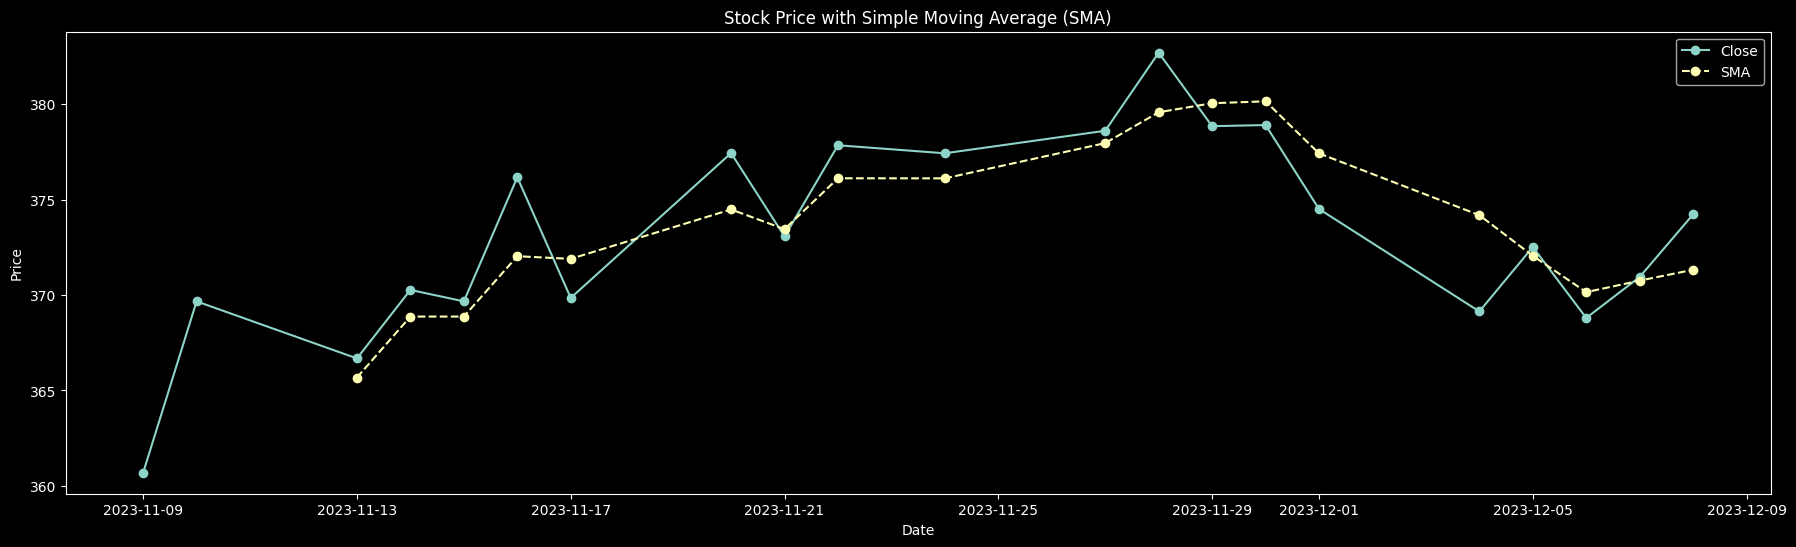

In [8]:
# Plotting
plt.figure(figsize=(22, 6))
plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index, msft['mySMA'], label='SMA', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### EMA

In [9]:
def calculateEMA(close_prices, sma_values, smooth,atr_data[i] = sum_true_range / (i - (i - window_t + 1) + 1); window_size):
    multiplier = smooth / (window_size + 1)
    ema_values = []

    for i in range(0, window_size - 1):
        ema_values.append(0)

    first = True
    for i in range(window_size - 1, len(close_prices)):
        if first:
            res = close_prices[i] * multiplier + sma_values[i] * (1 - multiplier)
            first = False
        else:
            res = close_prices[i] * multiplier + ema_values[-1] * (1 - multiplier)
        ema_values.append(res)

    return ema_values

smooth_value = 2  # You can adjust this value based on your preference
window_size = 3  # Adjust the window size based on your requirements
msft['EMA'] = ema_values = calculateEMA(msft['Close'], msft['mySMA'], smooth_value, window_size)
msft['myEMA'] = EMA(msft['Close'], msft['mySMA'], window_size, smooth_value)

/tmp/ipykernel_16691/572351570.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res = close_prices[i] * multiplier + sma_values[i] * (1 - multiplier)
/tmp/ipykernel_16691/572351570.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  res = close_prices[i] * multiplier + ema_values[-1] * (1 - multiplier)


In [10]:
msft.tail(5)

,Open,High,Low,Close,Adj Close,Volume,SMA,mySMA,EMA,myEMA
Date,,,,,,,,,,
2023-12-04,369.100006,369.519989,362.899994,369.140015,369.140015,32063300,374.186676,374.186676,372.998941,372.998941
2023-12-05,366.450012,373.079987,365.619995,372.519989,372.519989,23065000,372.056671,372.056671,372.759465,372.759465
2023-12-06,373.540009,374.179993,368.029999,368.799988,368.799988,21182100,370.153330,370.153330,370.779726,370.779726
2023-12-07,368.230011,371.450012,366.320007,370.950012,370.950012,23118900,370.756663,370.756663,370.864869,370.864869
2023-12-08,369.200012,374.440002,368.279999,374.230011,374.230011,20034491,371.326670,371.326670,372.547440,372.547440


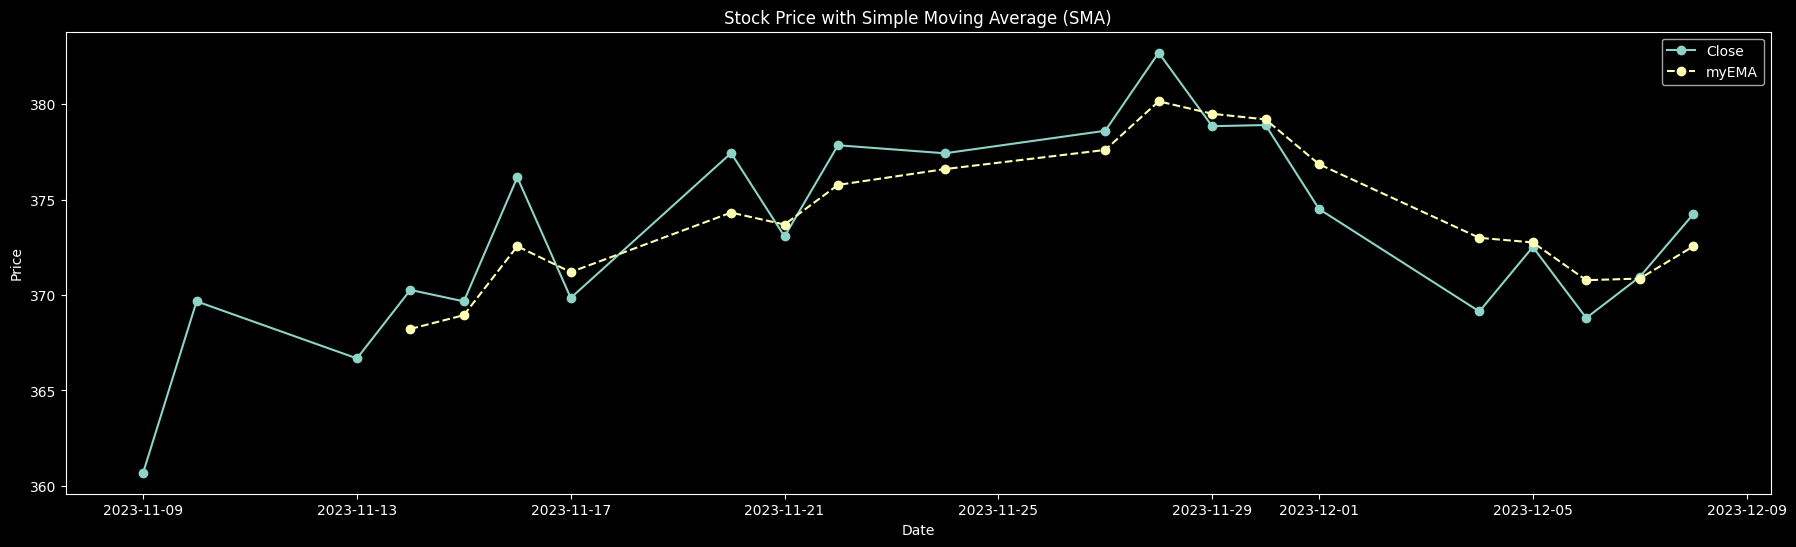

In [11]:
# Plotting
plt.figure(figsize=(22, 6))
plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index[3:], msft['myEMA'][3:], label='myEMA', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### WMA

In [12]:
def calculateWMA(df_t, numberOfDays_t):
	"""
	@brief	Calculates the weighted moving average

	@params	df_t			This dataframe with the stocks data
			numberOfDays	the period of days to calculate
							the average
	
	@returns	a list containing the calculated WMA
	"""
	WMA = []
	weight = 0
	for i in range(1, numberOfDays_t+1):
		weight += i
	for i in range(0, numberOfDays_t-1):
		WMA.append(0)
	for i in range(numberOfDays_t, len(df_t.Close) + 1):
		sum = 0
		counter = 1
		for j in range(i-numberOfDays_t, i):
			sum += df_t.Close[j] * (counter/weight) 
			counter += 1
		WMA.append(sum)
	
	return WMA

msft['WMA'] = calculateWMA(msft, window_size)
msft['myWMA'] = WMA(msft['Close'], window_size)

/tmp/ipykernel_16691/2141784433.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum += df_t.Close[j] * (counter/weight)


In [13]:
print(msft.head(10))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-11-09  362.299988  364.790009  360.359985  360.690002  359.959412   
2023-11-10  361.489990  370.100006  361.070007  369.670013  368.921234   
2023-11-13  368.220001  368.470001  365.899994  366.679993  365.937256   
2023-11-14  371.010010  371.950012  367.350006  370.269989  369.519989   
2023-11-15  371.279999  373.130005  367.109985  369.670013  369.670013   
2023-11-16  370.959991  376.350006  370.179993  376.170013  376.170013   
2023-11-17  373.609985  374.369995  367.000000  369.850006  369.850006   
2023-11-20  371.220001  378.869995  371.000000  377.440002  377.440002   
2023-11-21  375.670013  376.220001  371.119995  373.070007  373.070007   
2023-11-22  378.000000  379.790009  374.970001  377.850006  377.850006   

              Volume         SMA       mySMA         EMA       myEMA  \
Date                                   

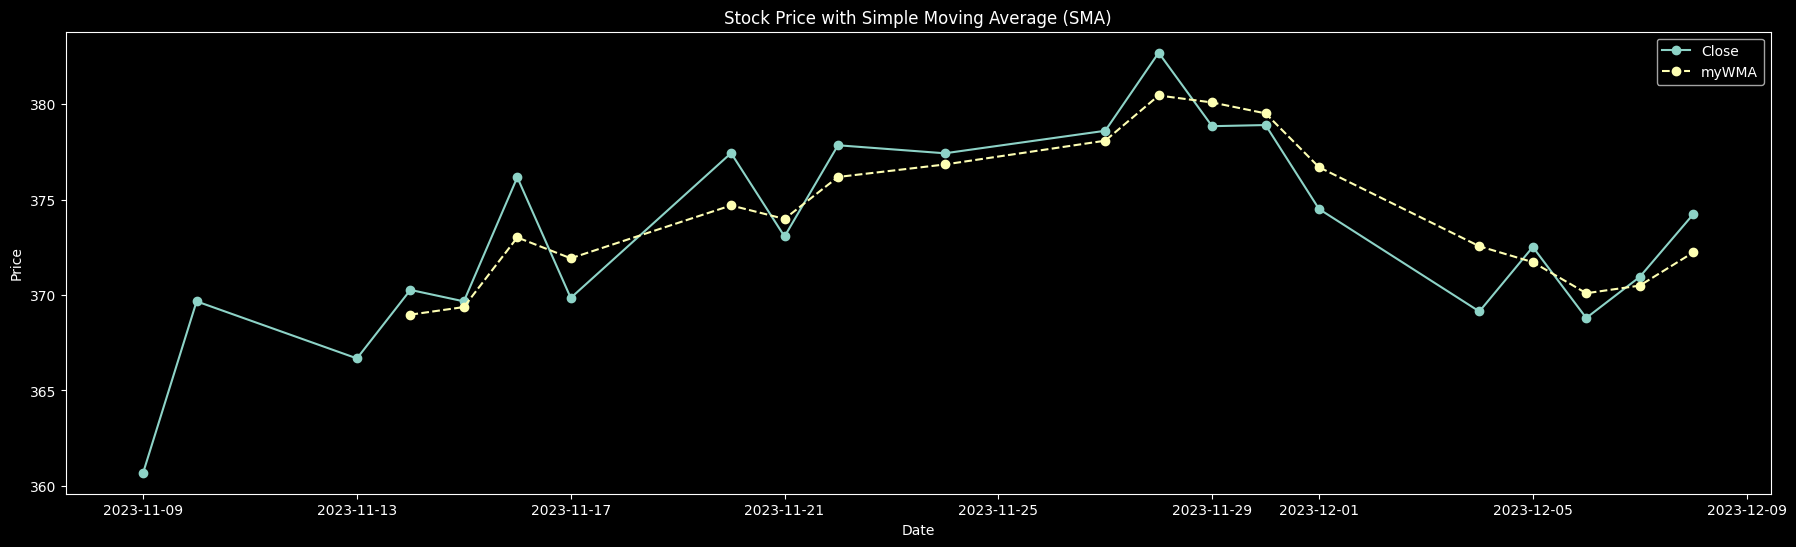

In [14]:
# Plotting
plt.figure(figsize=(22, 6))
plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index[3:], msft['myWMA'][3:], label='myWMA', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## ATR

In [7]:
def calculate_atr(data, period=14):
    # Calculate True Range (TR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))

    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

    # Calculate ATR
    data['ATR'] = data['TrueRange'].rolling(window=period).mean()

    # Drop temporary columns
    data = data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TrueRange'], axis=1)

    return data['ATR']
msft['ATR'] = calculate_atr(msft)
msft['myATR'] = ATR(msft['Close'], msft['High'], msft['Low'], 14)

In [8]:
print(msft.tail(8))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-11-29  383.760010  384.299988  377.440002  378.850006  378.850006   
2023-11-30  378.489990  380.089996  375.470001  378.910004  378.910004   
2023-12-01  376.760010  378.160004  371.309998  374.510010  374.510010   
2023-12-04  369.100006  369.519989  362.899994  369.140015  369.140015   
2023-12-05  366.450012  373.079987  365.619995  372.519989  372.519989   
2023-12-06  373.540009  374.179993  368.029999  368.799988  368.799988   
2023-12-07  368.230011  371.450012  366.320007  370.950012  370.950012   
2023-12-08  369.200012  374.459991  368.230011  374.230011  374.230011   

              Volume  High-Low  High-PrevClose  Low-PrevClose  TrueRange  \
Date                                                                       
2023-11-29  28963400  6.859985        1.599976       5.260010   6.859985   
2023-11-30  30554400  4.619995 

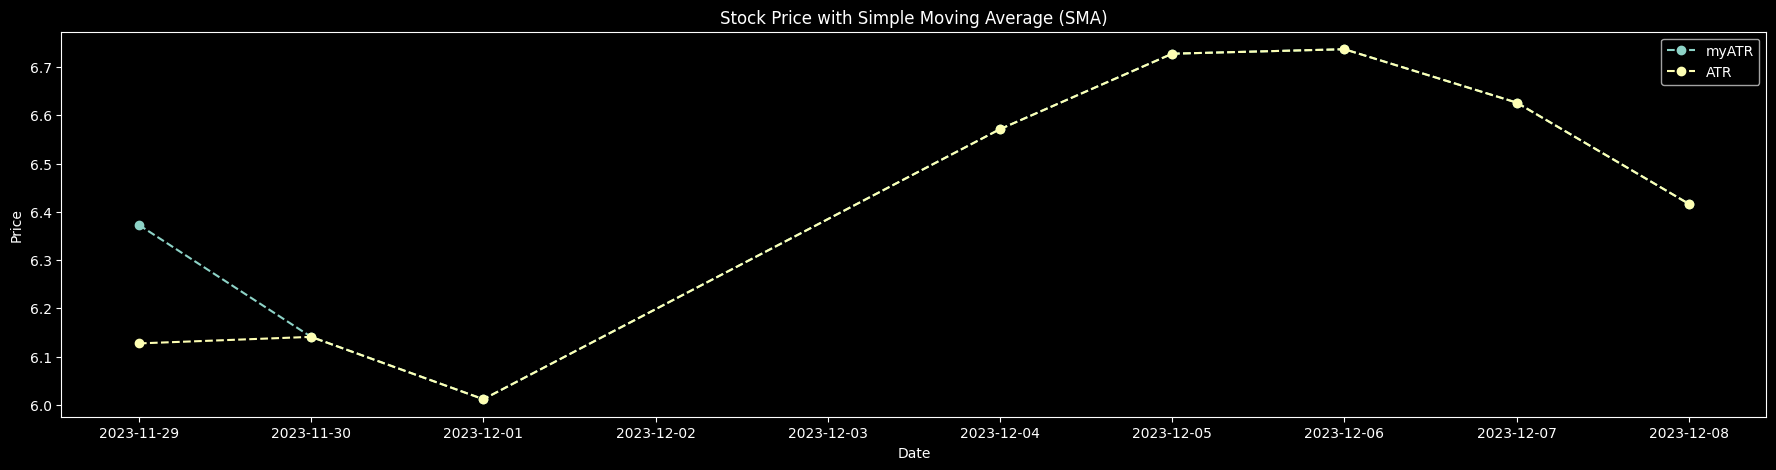

In [9]:
# Plotting
plt.figure(figsize=(22, 5))
# plt.plot(msft.index, msft['Close'], label='Close', marker='o')
plt.plot(msft.index[13:], msft['myATR'][13:], label='myATR', linestyle='--', marker='o')
plt.plot(msft.index, msft['ATR'], label='ATR', linestyle='--', marker='o')
plt.title('Stock Price with Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()